## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2019.

# Assignment 1, Task 3: Dimensionality Reduction

This task is devoted to dimensionality reduction. How to map high-dimensional data into low-dimensional space is an interesting topic in the machine learning field. It is related to another hot topic -- unsupervised learning. In this section, you are going to learn two different methods for this dimensionality reduction.

* Principal Component Analysis (PCA)
* t-Distributed Stochastic Neighbor Embedding (t-SNE) 

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from utils.cifar_utils import load_data

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

## Load Data

We will use the CIFAR-10 dataset.

In [2]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()
X_train = X_train.reshape([50000,3,32,32]).transpose((0,2,3,1))
X_test = X_test.reshape([10000,3,32,32]).transpose((0,2,3,1))
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

# Data organizations:
# Train data: 49000 samples from original train set: 1~49000
# Validation data: 1000 samples from original train set: 49000~50000
# Test data: 10000 samples from original test set: 1~10000
# Development data (for gradient check): 100 from the train set: 1~49000 #TODOTA is this 100 or 1000?
num_training = 49000
num_validation = 1000
num_dev = 100

X_val = X_train[-num_validation:]
y_val = y_train[-num_validation:]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

X_train = X_train[:num_training]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data
mean_image = np.mean(X_train, axis=0)

X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image
X_test = X_test.astype(np.float32) - mean_image
X_dev = X_dev.astype(np.float32) - mean_image

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Development data shape:', X_dev.shape)
print('Development data shape', y_dev.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
(49000, 32, 32, 3) (1000, 32, 32, 3) (10000, 32, 32, 3) (100, 32, 32, 3)
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Development data shape: (100, 32, 32, 3)
Development data shape (100,)


## Part 1: Principal Component Analysis (PCA)

<span style="color:red"><strong>TODO</strong></span>: You have to complete the code in **./utils/features/pca.py**.

### Naive PCA

In [3]:
from utils.features.pca import pca_naive

X_patch = X_train[:,:,:,0]
X_patch = np.reshape(X_patch, (X_patch.shape[0], -1))

In [4]:
# Start PCA
K = 300
P, T = pca_naive(X_patch, K)

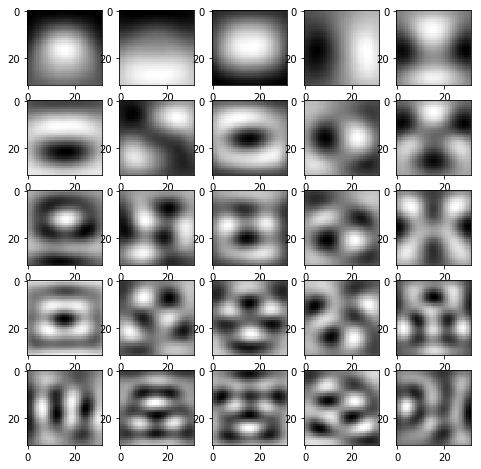

In [5]:
# Show principle components of P using a 5x5 subplot
# Visualize P
r = 5
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = np.reshape(P[r*i+j], [32,32])
        axarr[i][j].imshow(img, cmap="gray")

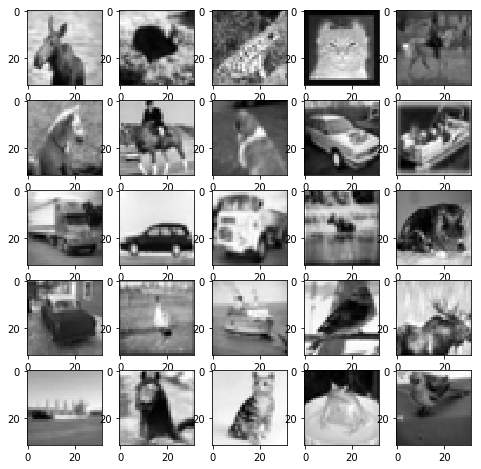

In [6]:
# Select a small set of images for test
num_training = 49000
num_pca = 25
mask = np.random.choice(num_training, num_pca, replace=False)
X_pca = X_train[mask,:,:,0]

# Visualize one channel of images 
r = 5
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = X_pca[r*i+j]
        axarr[i][j].imshow(img, cmap="gray")

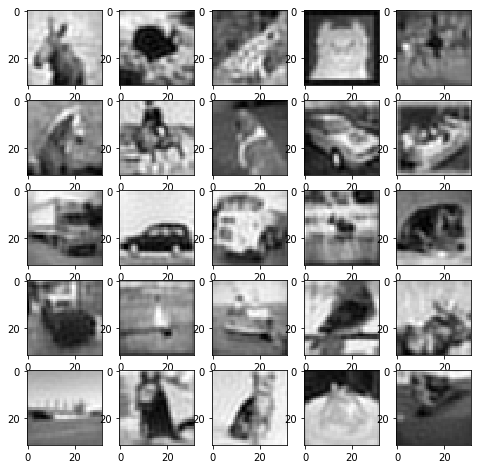

In [7]:
# Test your result
# Reduce dimension with P
X_features = []
for n in range(num_pca):
    img = X_pca[n]
    feature = np.dot(P, np.reshape(img, (-1,)))
    X_features.append(feature)

# Reconstruct image
X_recon = []
for n in range(num_pca):
    feature = X_features[n]
    img = np.reshape(np.dot(feature, P), (32,32))
    X_recon.append(img)

# Visualize results
r = 5
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = X_recon[r*i+j]
        axarr[i][j].imshow(img, cmap="gray")

### PCA + Neural network

<span style="color:red"><strong>TODO</strong></span>: Use PCA to preprocess images before training a neural network: 

1. Do PCA preprocessing on each channel of the original image separately.
2. Stack PCA features from three channels into one vector, and use that vector as an input for MLP.
3. Train the MLP and show the results. 

In [8]:
from utils.train_funcs import train, test
from utils.classifiers.mlp import MLP

## TODO: pca preprocessing -> mlp classification

K = 300

# Combine data and apply PCA preprocessing
y = np.concatenate((y_train, y_val,y_test), axis = 0)
X_patch1 = np.concatenate( (X_train[:,:,:,0], X_val[:,:,:,0], X_test[:,:,:,0]), axis = 0)
X_patch1 = np.reshape(X_patch1, (X_patch1.shape[0], -1))
P1, T1 = pca_naive(X_patch1, K)
X_patch1 = X_patch1.dot(P1.T) 

X_patch2 = np.concatenate( (X_train[:,:,:,1], X_val[:,:,:,1], X_test[:,:,:,1]), axis = 0)
X_patch2 = np.reshape(X_patch2, (X_patch2.shape[0], -1))
P2, T2 = pca_naive(X_patch2, K)
X_patch2 = X_patch2.dot(P2.T) 

X_patch3 = np.concatenate( (X_train[:,:,:,2], X_val[:,:,:,2], X_test[:,:,:,2]), axis = 0)
X_patch3 = np.reshape(X_patch3, (X_patch3.shape[0], -1))
P3, T3 = pca_naive(X_patch3, K)
X_patch3 = X_patch3.dot(P3.T) 


X_patch_train = np.concatenate((X_patch1, X_patch2, X_patch3),axis = 1)

X_test_pca = X_patch_train[-10000:]
y_test_pca = y[-10000:]

X_train_pca = X_patch_train[:50000]
y_train_pca = y[:50000]

X_val_pca = X_train_pca[-1000:]
y_val_pca = y_train_pca[-1000:]

X_train_pca = X_train_pca[:49000]
y_train_pca = y_train_pca[:49000]

model = MLP(input_dim=900, hidden_dims=[100, 100], num_classes=10, reg=0.1, weight_scale=1e-3)

num_epoch = 20
batch_size = 300
lr = 1e-2
verbose = True
train_acc_hist, val_acc_hist = train(model, X_train_pca, y_train_pca, X_val_pca, y_val_pca, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test(model, X_test_pca, y_test_pca)

number of batches for training: 163
3000/49000 loss: 2.3041433996311476
6000/49000 loss: 2.3040397691707004
9000/49000 loss: 2.3031465868427192
12000/49000 loss: 2.302580307830603
15000/49000 loss: 2.296633663531785
18000/49000 loss: 2.288523681080158
21000/49000 loss: 2.233831271772023
24000/49000 loss: 2.168391522594652
27000/49000 loss: 2.1850696537413894
30000/49000 loss: 2.174580588803784
33000/49000 loss: 2.214535441337487
36000/49000 loss: 2.1372787130359647
39000/49000 loss: 2.1640052291403875
42000/49000 loss: 2.224401531645372
45000/49000 loss: 2.1800977136897175
48000/49000 loss: 2.1615458182454628
epoch 1: valid acc = 0.2, new learning rate = 0.0095
3000/49000 loss: 2.1841736433852557
6000/49000 loss: 2.160477985631217
9000/49000 loss: 2.156246347238067
12000/49000 loss: 2.2037504956211893
15000/49000 loss: 2.151513227137674
18000/49000 loss: 2.1697161278992585
21000/49000 loss: 2.1622880168402157
24000/49000 loss: 2.2070820826572635
27000/49000 loss: 2.1605183461728785
300

36000/49000 loss: 1.3020713375509845
39000/49000 loss: 1.5140048857117128
42000/49000 loss: 1.4806236424838466
45000/49000 loss: 1.511624694824567
48000/49000 loss: 1.3898897235374594
epoch 13: valid acc = 0.498, new learning rate = 0.005133420832795048
3000/49000 loss: 1.4802506100010393
6000/49000 loss: 1.4529659149596128
9000/49000 loss: 1.5629573269006962
12000/49000 loss: 1.4844304601065088
15000/49000 loss: 1.4643535925079234
18000/49000 loss: 1.4101347007061664
21000/49000 loss: 1.461205330017859
24000/49000 loss: 1.38745156834841
27000/49000 loss: 1.37342555615152
30000/49000 loss: 1.4867839249548331
33000/49000 loss: 1.4321718262762952
36000/49000 loss: 1.4991051956598265
39000/49000 loss: 1.4999277519275234
42000/49000 loss: 1.355271266060894
45000/49000 loss: 1.2758809704351117
48000/49000 loss: 1.4686425767896147
epoch 14: valid acc = 0.537, new learning rate = 0.0048767497911552955
3000/49000 loss: 1.3178610077445196
6000/49000 loss: 1.5740535309396262
9000/49000 loss: 1.4

0.5162

<span style="color:red"><strong>TODO</strong></span>: Plot training, validation and test set accuracy.

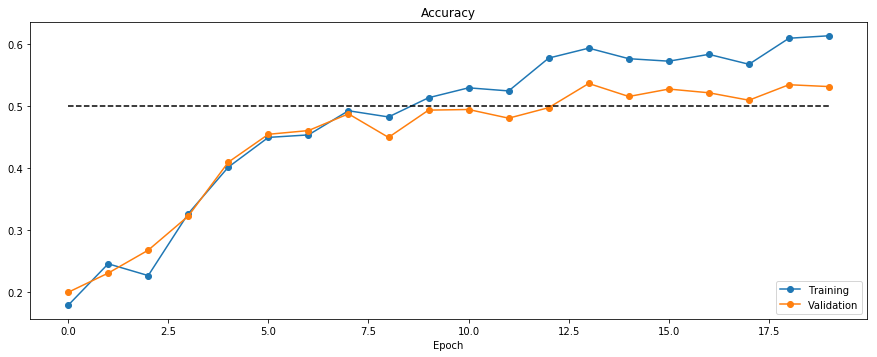

In [9]:
## TODO:
# plot the accuracy history
plt.subplot(2, 1, 1)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.plot(val_acc_hist, '-o', label='Validation')
plt.plot([0.5] * len(val_acc_hist), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

## Part 2: t-SNE (optional, bonus +10 points)

t-SNE is is a machine learning algorithm for nonlinear dimensionality reduction developed by Geoffrey Hinton and Laurens van der Maaten. It is also a good way of visualizing high-dimensional data in 2D. We show its application for CIFAR10. Later it will be re-used in a CNN network. Experimenting with t-SNE can be fun. One thing to try is to visualize the output of each layer of MLP to observe the differences.

<p style="line-height: 1.2;">[1] Maaten, Laurens van der, and Geoffrey Hinton. "Visualizing data using t-SNE." Journal of Machine Learning Research 9.Nov (2008): 2579-2605.</p>
<p style="line-height: 1.2;">[2] Adaptive learning rate scheme by Jacobs https://www.willamette.edu/~gorr/classes/cs449/Momentum/deltabardelta.html</p>
<p style="line-height: 1.2;">[3] http://cs.stanford.edu/people/karpathy/cnnembed/</p>
<p style="line-height: 1.2;">[4] How to Use t-SNE Effectively, with examples.
 https://distill.pub/2016/misread-tsne</p>

In [10]:
from utils.features.tsne import tsne

#### tSNE of original data

In [11]:
random_select = np.random.choice(10000, 500, replace=False)
X = X_test[random_select,:,:,0].reshape(500,1024).astype('float')/255.0
tic = time.time()
Y = tsne(X, low_dim=2, perplexity=30.0)
print("it takes {} seconds".format(time.time()-tic))

C:\Users\shrav\Desktop\e4040-2019fall-assignment1-amr2331-master\utils\features\tsne.py:15: RuntimeWarning: divide by zero encountered in log
  H = -np.dot(np.log(P), P)


2.4568489161441494
The 100 th loop cost: 14.438773842249951, computation time: 3.4310178756713867
The 200 th loop cost: 1.1125752510304037, computation time: 5.4330291748046875
The 300 th loop cost: 1.1076430754641189, computation time: 8.883047103881836
The 400 th loop cost: 1.1075243313890857, computation time: 10.819058418273926
The 500 th loop cost: 1.1075233131937419, computation time: 12.905068635940552
The 600 th loop cost: 1.1075233051988593, computation time: 14.811077356338501
The 700 th loop cost: 1.1075233051361797, computation time: 16.647087335586548
The 800 th loop cost: 1.1075233051356368, computation time: 18.506099224090576
The 900 th loop cost: 1.1075233051356261, computation time: 20.92410922050476
The 1000 th loop cost: 1.1075233051356257, computation time: 23.758126258850098
it takes 24.330126523971558 seconds


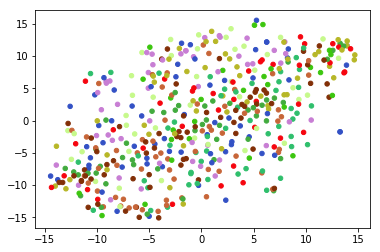

In [12]:
## visualize tSNE of original data
labels = y_test[random_select]
colors = np.random.rand(10,3)
color_labels = [colors[int(i)] for i in labels.tolist()]
plt.scatter(Y[:,0], Y[:,1], 20, color_labels)
plt.show()

#### tSNE of data after two hidden layers

Do visualization of the tSNE of data after going through MLP. In the visualization result, you should find that in comparison with the tSNE of original data where all data points mess up with each other. While the tSNE of data after two-layer networks would be shown as multiple clusters in a 2D panel.

In [13]:
# Define MLP model
model = MLP(input_dim=3072, hidden_dims=[100], num_classes=10, reg=0.1, weight_scale=1e-3)

num_epoch = 10
batch_size = 200
lr = 1e-3
verbose = False
train_acc_hist, val_acc_hist = train(model, X_train, y_train, X_val, y_val, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test(model, X_test, y_test)

number of batches for training: 245
epoch 1: valid acc = 0.418, new learning rate = 0.00095
epoch 2: valid acc = 0.456, new learning rate = 0.0009025
epoch 3: valid acc = 0.464, new learning rate = 0.000857375
epoch 4: valid acc = 0.479, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.473, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.512, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.505, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.512, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.526, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.514, new learning rate = 0.0005987369392383785
test acc: 0.5004


0.5004

<span style="color:red"><strong>TODO</strong></span>: Do visualization of the tSNE of data after going through MLP. 

In [19]:
# run tSNE
X = X_test[random_select]
X = model.layers[0].feedforward(X)
X = model.layers[1].feedforward(X)
#X = np.argmax(X, axis=1)
tic = time.time()
# TODO:
# You need to first go through two hidden layers.
Y = tsne(X, low_dim=2, perplexity=30.0)
# End TODO
print("it takes {} seconds".format(time.time()-tic))

2.261239791868677
The 100 th loop cost: 13.516958123577425, computation time: 1.9480109214782715
The 200 th loop cost: 0.8827142069422288, computation time: 3.784022092819214
The 300 th loop cost: 0.8584183696383063, computation time: 5.66903018951416
The 400 th loop cost: 0.8548745108907613, computation time: 7.595048666000366
The 500 th loop cost: 0.8541587291386755, computation time: 9.469051837921143
The 600 th loop cost: 0.853890741645727, computation time: 11.386062860488892
The 700 th loop cost: 0.853764983626208, computation time: 13.431074380874634
The 800 th loop cost: 0.8536985720125242, computation time: 15.432082414627075
The 900 th loop cost: 0.85366035678809, computation time: 17.372093200683594
The 1000 th loop cost: 0.8536369512982308, computation time: 19.31710386276245
it takes 19.80210256576538 seconds


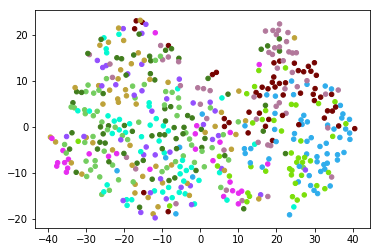

In [20]:
# TODO:
# visualize tSNE 2D representation of data after two hidden layers
labels = y_test[random_select]
colors = np.random.rand(10,3)
color_labels = [colors[int(i)] for i in labels.tolist()]
plt.scatter(Y[:,0], Y[:,1], 20, color_labels)
plt.show()

<span style="color:red"><strong>TODO</strong></span>: Try tuning the parameters of tSNE, do visualization of the new tSNE of data.

In [21]:
# TODO:
# Tune the parameter, show the results.
# run tSNE
X = X_test[random_select]
X = model.layers[0].feedforward(X)
X = model.layers[1].feedforward(X)
X = np.exp(X) / np.tile(np.sum(np.exp(X), axis=1, keepdims=True), 10) #removing divide by 0 erro
tic = time.time()
# TODO:
# You need to first go through two hidden layers.
Y = tsne(X, low_dim=2, perplexity=30.0)
# End TODO
print("it takes {} seconds".format(time.time()-tic))

0.19446461197088838
The 100 th loop cost: 11.246821692568906, computation time: 1.9700117111206055
The 200 th loop cost: 0.5020703202146423, computation time: 4.113025903701782
The 300 th loop cost: 0.48332246415962754, computation time: 6.092033624649048
The 400 th loop cost: 0.48086997426651046, computation time: 7.978045225143433
The 500 th loop cost: 0.48043312004455924, computation time: 9.90905499458313
The 600 th loop cost: 0.48028669587407397, computation time: 12.04406476020813
The 700 th loop cost: 0.480221335107129, computation time: 14.324077129364014
The 800 th loop cost: 0.4801885871374395, computation time: 16.821090936660767
The 900 th loop cost: 0.48017084427570894, computation time: 19.132102012634277
The 1000 th loop cost: 0.4801609886410322, computation time: 21.11411428451538
it takes 21.64211368560791 seconds


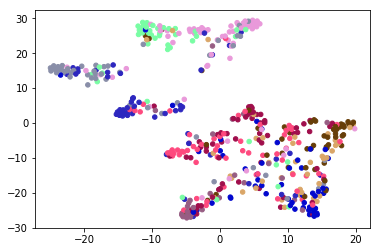

In [22]:
# TODO:
# visualize tSNE 2D representation of data after two hidden layers
labels = y_test[random_select]
colors = np.random.rand(10,3)
color_labels = [colors[int(i)] for i in labels.tolist()]
plt.scatter(Y[:,0], Y[:,1], 20, color_labels)
plt.show()